In [25]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import scipy 
import scipy.integrate as integrate
import scipy.special as special

**A. Periods and Frequencies** 
Consider the following signals (assume $t$ is in seconds):


A single sine wave:

$f_1(t) = \sin(2\pi \cdot 3 t)$


The sum of two sine waves with different frequencies:

$f_2(t) = \sin(2\pi \cdot 3 t) + \frac{1}{2}\sin(2\pi \cdot 7 t)$


In [26]:
pi = np.pi

def f1(t):
    y = np.sin(2*pi*3*t)
    return y
def f2(t): 
    y = np.sin(2*pi*3*t) + 0.5*np.sin(2*pi*7*t)
    return y 


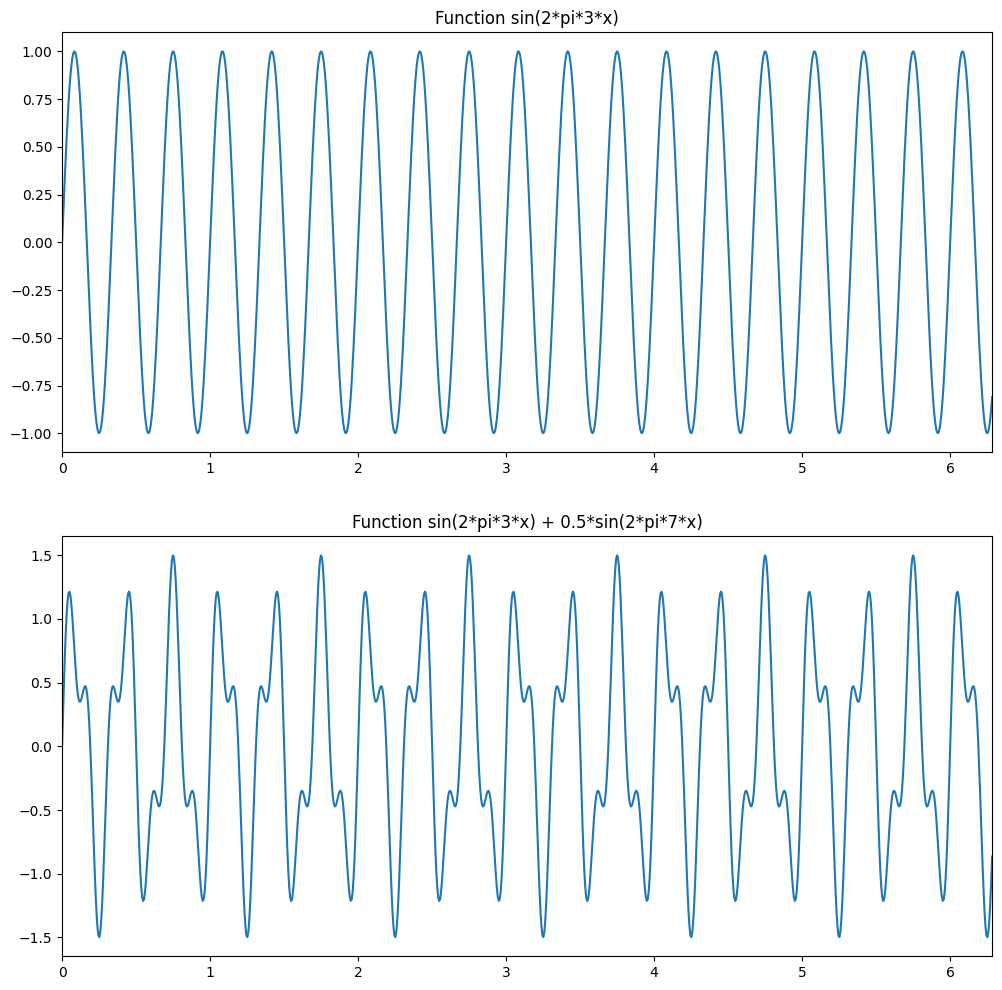

In [27]:
N = 1000
x = np.linspace(0, 2*pi, N)

plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.title("Function sin(2*pi*3*x)")
plt.plot(x, f1(x))
plt.xlim(0, 2*np.pi)


plt.subplot(2,1,2)
plt.title("Function sin(2*pi*3*x) + 0.5*sin(2*pi*7*x)")
plt.plot(x, f2(x))
plt.xlim(0, 2*np.pi)



plt.show()

**B. Discrete Fourier Analysis**

In [28]:
def f3(t):
    return np.sin(2*pi*t)


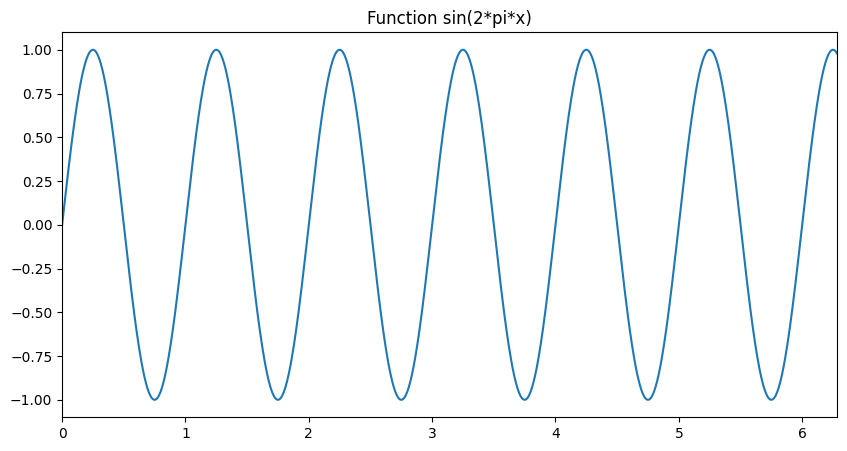

In [29]:
N = 1000
x = np.linspace(0, 2*pi, N)

plt.figure(figsize=(10,5))

plt.subplot(1,1,1)
plt.title("Function sin(2*pi*x)")
plt.plot(x, f3(x))
plt.xlim(0, 2*np.pi)

plt.show()

**C. Simple Fourier Transfomrs**

**E. Spectral density**

In [30]:
from scipy.fft import fft, ifft, fftfreq #importing fourier and inverse and frequency

**defined as** : y[n] = $\sum_{n = 0}^{N-1} \exp({-2*\pi*j*k*n\div N})*x[n]$ \
x[n] = $1\div N$ * $\sum_{n = 0}^{N-1} \exp({2*\pi*j*k*n\div N})*y[n]$ \
with x[n] an array of values taken by a function x

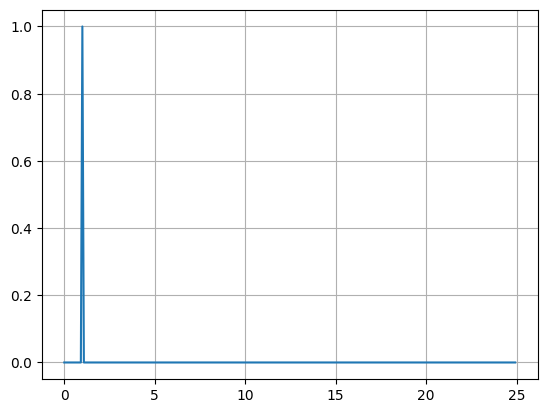

In [ ]:
outputs = f3(x)
fourier = fft(outputs)

# Number of sample points
N = 600
# sample spacing
T = 1 / 50.0
x = np.linspace(0.0, N*T, N, endpoint=False)
yf = fft(f3(x))
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

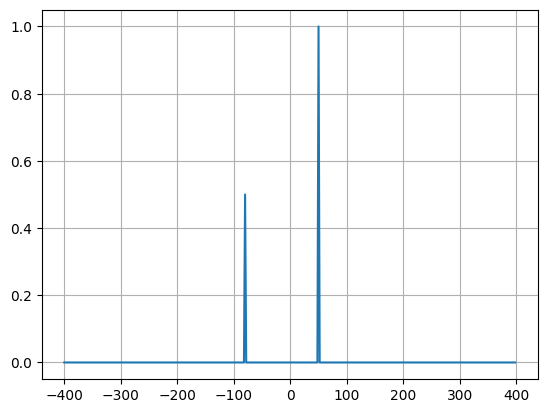

In [42]:
from scipy.fft import fftshift
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [46]:
omega = [2*pi, 1j] #array of real and imaginary parts
# complex(omega[0], omega[1]) gives 2*pi + 3j in that case 
#if we want the imaginary part or the real part we just add .real or . imag
#to have the conjugate, we write .conjugate()
#to have the modulus is abs() and squared if needed

def g1(omega, t):
    return np.cos(complex(omega[0], omega[1])*t)
def phi(t):
    return 2*t
def g2(omega, t):
    return np.cos(complex(omega[0], omega[1])*t + phi(t))
def modulus(f):
    return abs(fft(f))**2

c:\Users\camil\Desktop\Stage\LPENS_Astro_and_statistics\Fourier_examples\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\camil\Desktop\Stage\LPENS_Astro_and_statistics\Fourier_examples\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


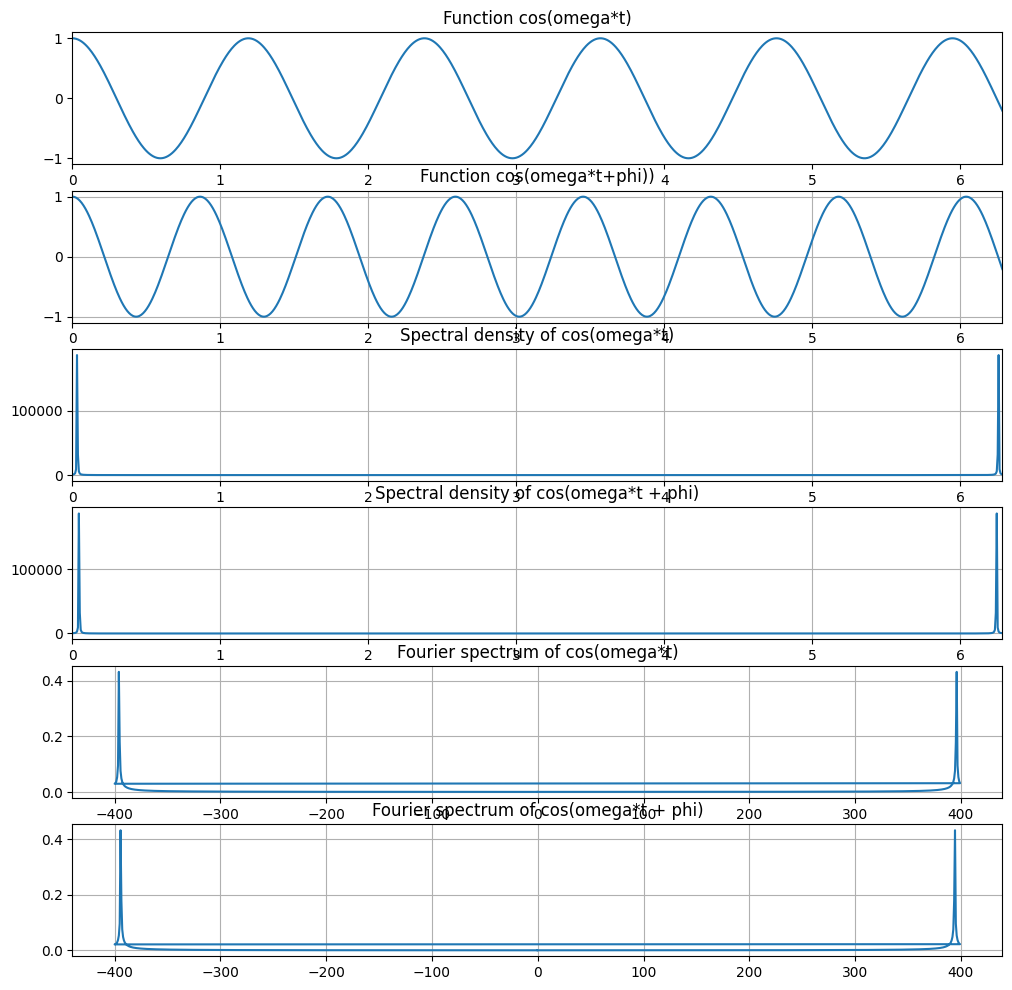

In [54]:
N = 1000
T = 1.0 / 800.0
x = np.linspace(0, 2*pi, N)

plt.figure(figsize=(12,12))

plt.subplot(6,1,1)
plt.title("Function cos(omega*t)")
plt.plot(x, g1(omega, x))
plt.xlim(0, 2*np.pi)


plt.subplot(6,1,2)
plt.title("Function cos(omega*t+phi))")
plt.plot(x, g2(omega, x))
plt.grid()
plt.xlim(0, 2*np.pi)


plt.subplot(6,1,3)
plt.title("Spectral density of cos(omega*t)")
plt.plot(x, modulus(g1(omega, x)))
plt.grid()
plt.xlim(0, 2*np.pi)


plt.subplot(6,1,4)
plt.title("Spectral density of cos(omega*t + phi)")
plt.plot(x, modulus(g2(omega,x)))
plt.grid()
plt.xlim(0, 2*np.pi)

plt.subplot(6,1,5)
plt.title("Fourier spectrum of cos(omega*t)")
yf = fft(g1(omega, x))
xf = fftfreq(N, T)
xf = fftshift(xf)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()



plt.subplot(6,1,6)
plt.title("Fourier spectrum of cos(omega*t + phi)")
yf = fft(g2(omega, x))
xf = fftfreq(N, T)
xf = fftshift(xf)
xf = fftshift(xf)
yplot = fftshift(yf)
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()



plt.show()

The spectral density doesn't change ! In that case we loose information, precisely the frequency ? 